In [185]:
pip install scipy matplotlib numpy 


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [186]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde , norm
from numpy.polynomial.polynomial import Polynomial

In [187]:
# Parameters
gamma = 1.0  # Damping coefficient
k = 1.0      # Spring constant
D = 4.0      # Noise strength
dt = 0.05    # Time step
T = 50000.0     # Total simulation time
n_steps = int(T / dt)  # Number of time steps

# Time array
time = np.linspace(0, T, n_steps)

# Initialize position
x = np.zeros(n_steps)

# Langevin dynamics simulation (Euler-Maruyama scheme)
for i in range(1, n_steps):
    noise = np.sqrt(2 * D * dt) * np.random.randn()
    x[i] = x[i-1] + (-k * x[i-1] / gamma) * dt + noise

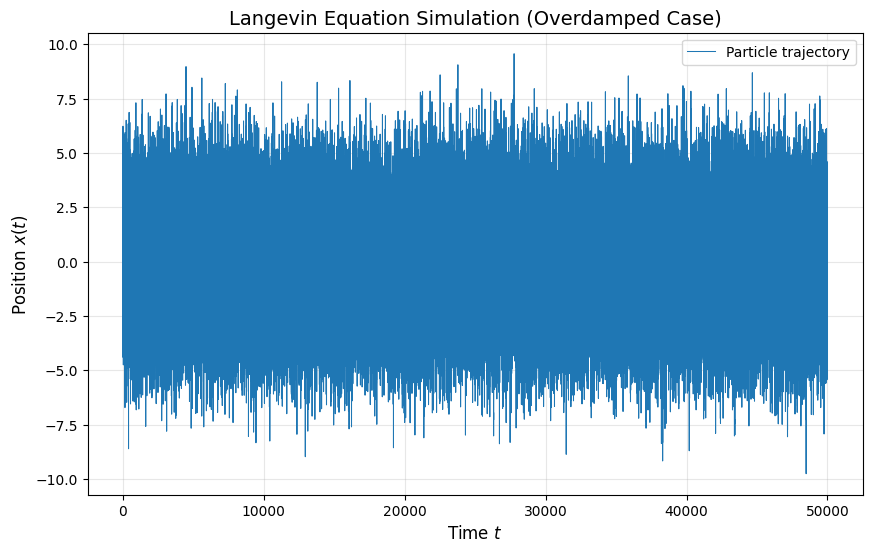

In [188]:
# Plotting the trajectory
plt.figure(figsize=(10, 6))
plt.plot(time, x, label="Particle trajectory", linewidth = 0.75)
plt.title("Langevin Equation Simulation (Overdamped Case)", fontsize=14)
plt.xlabel("Time $t$", fontsize=12)
plt.ylabel("Position $x(t)$", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# plt.hist(x, bins=100,density=True, alpha=0.5)
# kde = gaussian_kde(x)

# xli = np.linspace(np.min(x), np.max(x), 1000)
# smoothed_pdf = kde(xli)
# plt.plot(xli, smoothed_pdf, linewidth=2, color = '#47AF20')

# plt.show()

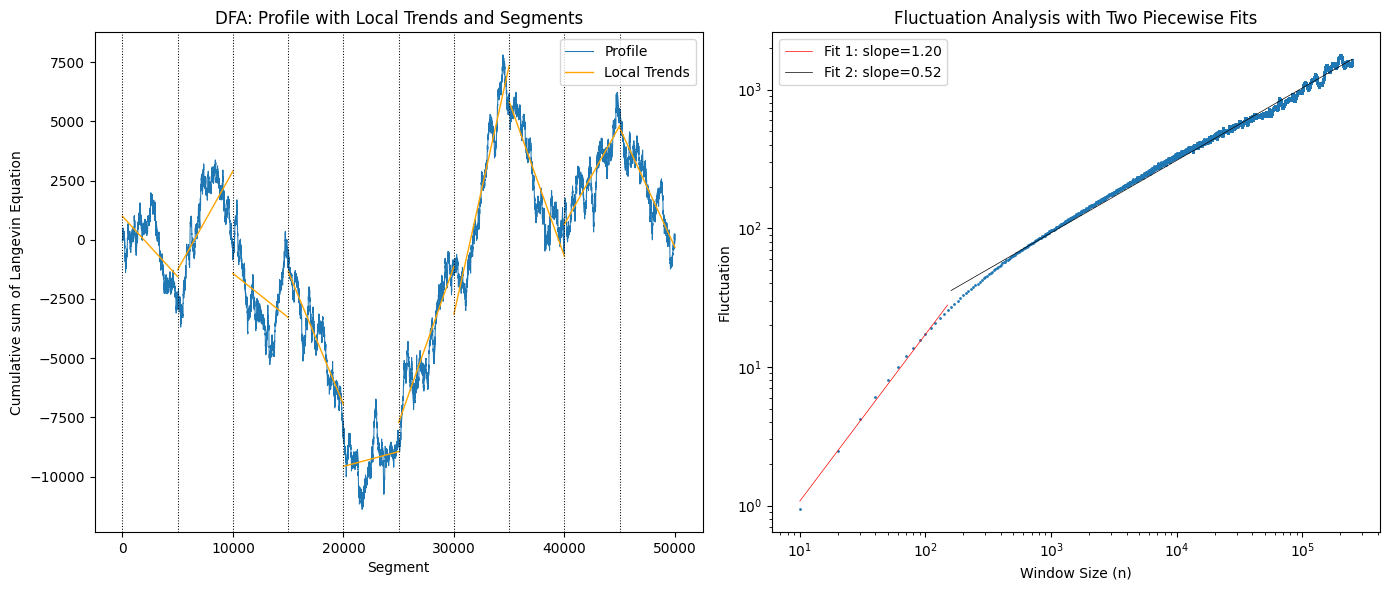

In [193]:
profile = np.cumsum(x -np.mean(x))
# Define box length (window size)
n = 100000  # Example box length
num_boxes = len(profile) // n  # Number of full boxes

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the full profile
# plt.figure(figsize=(10, 5))
ax1.plot(time, profile, linewidth=0.75, label="Profile (Cumulative Sum)")



# Loop through each segment and plot local trends
for i in range(num_boxes):
    start = int(i * n)
    end = int(start + n)
    
    t_segment = time[start:end]
    profile_segment = profile[start:end]

    # Fit a linear trend within this segment
    coeffs = np.polyfit(t_segment, profile_segment, 1)
    trend = np.polyval(coeffs, t_segment)

    # Plot the local trend
    ax1.plot(t_segment, trend, color='orange', linewidth=1)

    # Add vertical dotted lines to indicate segment boundaries
    ax1.axvline(time[start], color='black', linestyle=":", linewidth=0.75)

# Labels and formatting
ax1.set_xlabel("Segment")
ax1.set_ylabel("Cumulative sum of Langevin Equation")
ax1.set_title("DFA: Profile with Local Trends and Segments")
ax1.legend(["Profile", "Local Trends"])
ax1.grid(False)  # Removing grid for a cleaner look

N = len(time)

n = np.arange(10, N//4,10)
fluctuations = []
for i in n:
    boxes = N//i
    rmsvalues = []
    tr = []
    for box in range(boxes):
        a, b = box*i , (1+box)*i
        t = np.arange(i)
        segment = profile[a:b]
        lin = Polynomial.fit(t, segment, 1)  
        trend = lin(t) 
        tr.append(trend)
        rms = np.sqrt(np.mean((segment - trend) ** 2))
        rmsvalues.append(rms)
    fluctuations.append(np.sqrt(np.mean(np.array(rmsvalues) ** 2)))
logf = np.log(fluctuations)
ax2.loglog(n,fluctuations,".", markersize = 2)
logn = np.log(n)


# Define the breakpoint as an index into n (adjust this index as needed)
breakpoint = 15  # This is an index, not a window size value

# Fit a line to the first segment: from the smallest value to the breakpoint index
slope1, intercept1 = np.polyfit(logn[:breakpoint], logf[:breakpoint], 1)

# Fit a line to the second segment: from the breakpoint index to the end
slope2, intercept2 = np.polyfit(logn[breakpoint:], logf[breakpoint:], 1)

# Create fitted lines for plotting using the original x-values (n)
xvals1 = np.linspace(n[0], n[breakpoint-1], 100)
xvals2 = np.linspace(n[breakpoint], n[-1], 100)

# Since the fit was done in log-log space, convert back:
yvals1 = np.exp(intercept1) * (xvals1 ** slope1)
yvals2 = np.exp(intercept2) * (xvals2 ** slope2)

# Plot the two fits
ax2.loglog(xvals1, yvals1, label=f"Fit 1: slope={slope1:.2f}", color="red", linewidth=0.5)
ax2.loglog(xvals2, yvals2, label=f"Fit 2: slope={slope2:.2f}", color="black", linewidth=0.5)
ax2.legend()
ax2.set_xlabel("Window Size (n)")
ax2.set_ylabel("Fluctuation")
ax2.set_title("Fluctuation Analysis with Two Piecewise Fits")
plt.tight_layout()
plt.show()


In [190]:
# N = len(time)

# n = np.arange(10, N//4,10)
# fluctuations = []
# for i in n:
#     boxes = N//i
#     rmsvalues = []
#     tr = []
#     for box in range(boxes):
#         a, b = box*i , (1+box)*i
#         t = np.arange(i)
#         segment = profile[a:b]
#         lin = Polynomial.fit(t, segment, 1)  
#         trend = lin(t) 
#         tr.append(trend)
#         rms = np.sqrt(np.mean((segment - trend) ** 2))
#         rmsvalues.append(rms)
#     fluctuations.append(np.sqrt(np.mean(np.array(rmsvalues) ** 2)))
# logf = np.log(fluctuations)
# plt.loglog(n,fluctuations,".", markersize = 2)
# logn = np.log(n)


# # Define the breakpoint as an index into n (adjust this index as needed)
# breakpoint = 100  # This is an index, not a window size value

# # Fit a line to the first segment: from the smallest value to the breakpoint index
# slope1, intercept1 = np.polyfit(logn[:breakpoint], logf[:breakpoint], 1)

# # Fit a line to the second segment: from the breakpoint index to the end
# slope2, intercept2 = np.polyfit(logn[breakpoint:], logf[breakpoint:], 1)

# # Create fitted lines for plotting using the original x-values (n)
# xvals1 = np.linspace(n[0], n[breakpoint-1], 100)
# xvals2 = np.linspace(n[breakpoint], n[-1], 100)

# # Since the fit was done in log-log space, convert back:
# yvals1 = np.exp(intercept1) * (xvals1 ** slope1)
# yvals2 = np.exp(intercept2) * (xvals2 ** slope2)

# # Plot the two fits
# plt.loglog(xvals1, yvals1, label=f"Fit 1: slope={slope1:.2f}", color="red", linewidth=0.5)
# plt.loglog(xvals2, yvals2, label=f"Fit 2: slope={slope2:.2f}", color="black", linewidth=0.5)
# plt.legend()
# plt.xlabel("Window Size (n)")
# plt.ylabel("Fluctuation")
# plt.title("Fluctuation Analysis with Two Piecewise Fits")
# plt.tight_layout()
# plt.show()






In [191]:
# probably waste
# plt.loglog(n,tr)
# tlin = []
# Hbox = len(n)//2
# print(Hbox)
# logn = np.log(n)
# for i in range(2):
#     a, b = Hbox*(i) , Hbox*(1+i)
#     print(a,b)
#     # slope = (fluctuations[b]-fluctuations[a])/(n[b]-n[a])
#     x = n[a:b]
#     slope = np.polyfit(x,fluctuations[a:b],1)
#     print(slope)
#     yvals = np.polyval(slope,x)
#     plt.loglog(x,yvals)

    

